### Notebook to Reshuffle and split the Cosmogrid Dataset

Reshuffling and keeping only a part of the full cosmogrid dataset.

In [ ]:
#! apt-get update
#! sudo apt-get install texlive-latex-recommended 
#! sudo apt install texlive-latex-extra
#! sudo apt install dvipng
#!apt install cm-super
#!pip install chainconsumer

In [ ]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd

# Chainconsumer
from chainconsumer import ChainConsumer

# Matplotlib, seaborn and plot pretty 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

# Pillow
from PIL import Image

### **Import Datasets**

In [ ]:
# Mount drive to upload the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the data path
DATA_PATH = '/content/drive/My Drive/Maps_Project/Deliverables_Maps/Datasets/'

# IMAGE PATH
IMG_PATH = '/content/drive/My Drive/Maps_Project/Deliverables_Maps/Plots/'

# MODEL WEIGHTS PATH
MDL_WEIGHTS_PATH = '/content/drive/My Drive/Maps_Project/Deliverables_Maps/Saved_Models/'

In [ ]:
# Load maps
X_maps = np.float64(np.load(DATA_PATH+"maps_all_collage_flask_6cosmo_n625_jr0_wSN0_jz3.npz.npy",mmap_mode='r'))#[:100000]

# Load labels
y_cosmo = np.float64(np.load(DATA_PATH+"cosmo_params_all_collage_flask_6cosmo_n625_jr0_wSN0_jz3.npz.npy"))#[:100000]

In [ ]:
print(np.shape(X_maps))

(639375, 66, 66)


In [ ]:
leng = np.shape(X_maps)[0]

inds = np.arange(leng)
np.random.shuffle(inds)

X_maps_shuffled = X_maps[inds]
y_cosmo_shuffled = y_cosmo[inds]


print(np.shape(X_maps_shuffled))
print(np.shape(y_cosmo_shuffled))

(639375, 66, 66)
(639375, 6)


### Keep the first 100k maps

In [ ]:
X_maps_keep = X_maps_shuffled[:100000]
y_maps_keep = y_cosmo_shuffled[:100000]

In [ ]:
# Save them now
np.save(DATA_PATH+"X_maps_Cosmogrid_100k",X_maps_keep)
np.save(DATA_PATH+"y_maps_Cosmogrid_100k",y_maps_keep)

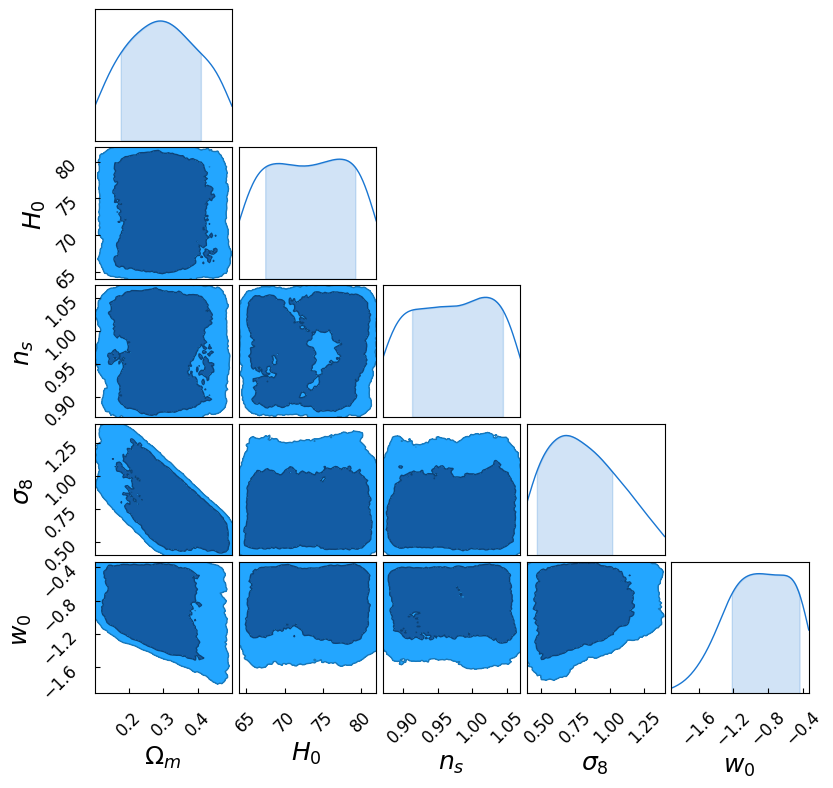

In [ ]:
plot_pretty()
params = ["$\Omega_m$", "$H_0$", "$n_s$",'$\sigma_8$','$w_0$']



c = ChainConsumer()
c.add_chain(y_maps_keep[:5000,:5],parameters=params,name='Training set')
#c.add_chain(y_val[:5000],parameters=params,name='Validation set')
#c.add_chain(y_test[:5000],parameters=params,name='Test set')


# Configure plot
c.configure(label_font_size=18,max_ticks=4,tick_font_size=12,
            legend_kwargs={"frameon":True, "fontsize":20}, kde=True)

fig = c.plotter.plot(figsize=(8.4,8.05))


#plt.tight_layout()
#plt.savefig(PLT_PATH+"Distribution_Cosmogrid.pdf")
plt.show()